In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete_correlationWithGroup.csv')
Data

,field1,Name,NewCode,code,Groupping,Sweetness,L,A,B,Total_phenol,...,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
0,0,DC1,DC8001-1,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
1,1,DC1,DC8001-2,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
2,2,DC1,DC8001-3,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
3,3,DC1,DC8001-4,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
4,4,DC1,DC8001-5,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,221,BK1,BK-10001-2,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
65,222,BK1,BK-10001-3,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
66,225,BK3,BK-10003-1,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61
67,226,BK3,BK-10003-2,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61


In [45]:
y = pd.get_dummies(Data.Groupping, prefix='Groupping')
y

,Groupping_1,Groupping_2,Groupping_3,Groupping_4,Groupping_5,Groupping_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
64,0,0,0,0,0,1
65,0,0,0,0,0,1
66,0,0,0,0,0,1
67,0,0,0,0,0,1


In [46]:
X = Data.iloc[:,5:]
X

,Sweetness,L,A,B,Total_phenol,Total_Flavonoid,Antioxidant,caffeic_acid,Theobromine,K,...,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
0,17.5,44.83,0.45,11.11,2.56,18.45,11.70,0.01,0.01,8366.91,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
1,17.5,44.83,0.45,11.11,2.56,18.45,11.70,0.01,0.01,8366.91,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
2,17.5,44.83,0.45,11.11,2.56,18.45,11.70,0.01,0.01,8366.91,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
3,17.5,44.83,0.45,11.11,2.56,18.45,11.70,0.01,0.01,8366.91,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
4,17.5,44.83,0.45,11.11,2.56,18.45,11.70,0.01,0.01,8366.91,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,15.0,49.48,1.25,11.67,0.94,4.14,11.72,0.02,0.01,8322.90,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
65,15.0,49.48,1.25,11.67,0.94,4.14,11.72,0.02,0.01,8322.90,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
66,17.0,52.42,0.81,12.40,1.99,9.39,14.73,0.00,0.01,11837.77,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61
67,17.0,52.42,0.81,12.40,1.99,9.39,14.73,0.00,0.01,11837.77,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61


In [47]:
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [48]:
def optimise_pls_cv(X_t, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X_t, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)


In [49]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 10)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X_t, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 6
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 7
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 6
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 8
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 8
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.8/dist-packages/sklear

In [50]:
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

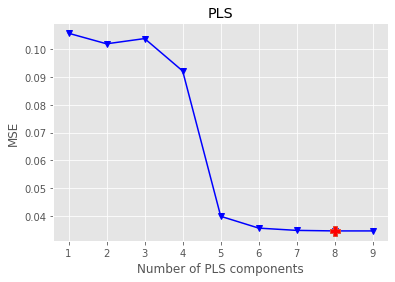

In [51]:
plot_metrics(mses, 'MSE', 'min')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.33, random_state=42)
pls = PLSRegression(n_components=8)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test).round(0)
accuracy_score(y_test,y_pred)

1.0

In [60]:
pls1 = PLSRegression(n_components=8)
pls1.fit(X,y)
pls_score = pls1.x_scores_
pls_score.shape


(69, 8)

In [64]:
pls1.n_components

8

In [62]:
dd=pd.concat([pd.DataFrame(pls_score, 
                           columns=[f'LV{n}' for n in range(1, pls.n_components + 1)]), 
              Data[['Groupping']]], axis = 'columns')
dd

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,Groupping
0,-4.005005,-1.214329,0.147902,0.386707,-0.070877,-1.489885,0.184617,0.018836,1
1,-4.005005,-1.214329,0.147902,0.386707,-0.070877,-1.489885,0.184617,0.018836,1
2,-4.005005,-1.214329,0.147902,0.386707,-0.070877,-1.489885,0.184617,0.018836,1
3,-4.005005,-1.214329,0.147902,0.386707,-0.070877,-1.489885,0.184617,0.018836,1
4,-4.005005,-1.214329,0.147902,0.386707,-0.070877,-1.489885,0.184617,0.018836,1
...,...,...,...,...,...,...,...,...,...
64,5.300124,-3.669751,-0.358616,-3.058072,3.116716,-1.492640,-2.152561,-0.003920,6
65,5.300124,-3.669751,-0.358616,-3.058072,3.116716,-1.492640,-2.152561,-0.003920,6
66,6.331047,-2.988643,-0.671334,-1.905759,0.899519,0.467943,3.330783,-0.069086,6
67,6.331047,-2.988643,-0.671334,-1.905759,0.899519,0.467943,3.330783,-0.069086,6


In [73]:
dpc=pd.DataFrame(pls1.x_weights_, 
                  index=X.columns,
                  columns=[f'LV{n+1}' for n in range(pls1.n_components)]).round(4)
dpc=dpc.reset_index()
dpc['feature'] = dpc['index']
dpc.drop(columns='index', inplace=True)
dpc

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,feature
0,-0.1903,-0.1620,-0.3029,-0.1891,-0.0694,0.0232,0.1639,0.5155,Sweetness
1,0.1556,0.3321,-0.0105,-0.1440,0.1037,0.0789,0.0931,-0.0564,L
2,0.1804,0.2159,-0.3271,0.1314,0.0135,-0.0015,-0.2319,-0.0195,A
3,0.1268,0.3038,0.1086,-0.1844,-0.1858,0.1220,-0.0576,0.4681,B
4,-0.0817,0.1594,-0.2031,0.4848,-0.1517,0.1123,0.2178,-0.0706,Total_phenol
5,-0.1895,0.1669,-0.2984,0.1720,-0.0827,0.0418,0.1195,-0.0166,Total_Flavonoid
6,0.1793,0.2455,0.0028,-0.0216,0.2160,-0.2532,0.4846,-0.1589,Antioxidant
7,0.1765,0.2222,0.1104,0.0913,-0.1170,-0.3183,-0.4074,0.0585,caffeic_acid
8,-0.0508,-0.3182,0.4212,-0.0494,-0.1810,0.1352,-0.0390,0.0161,Theobromine
9,0.1482,-0.0891,-0.0535,0.0095,-0.3345,0.2868,0.2625,-0.1014,K


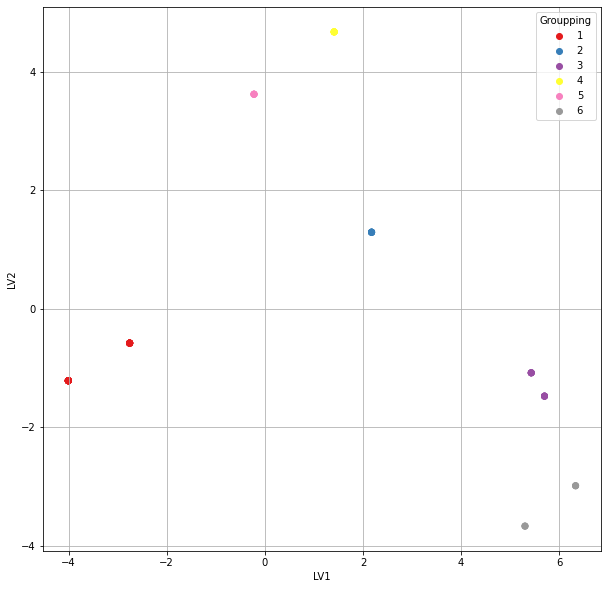

In [80]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(dd['LV1'],dd['LV2'],cmap='Set1', c=Data.Groupping.astype('category').cat.codes)
plt.xlabel('LV1')
plt.ylabel('LV2')
plt.grid(b=None)
plt.legend(handles=scatter.legend_elements()[0], 
           labels = ['1','2','3','4','5','6'],
           title = "Groupping")
plt.show()


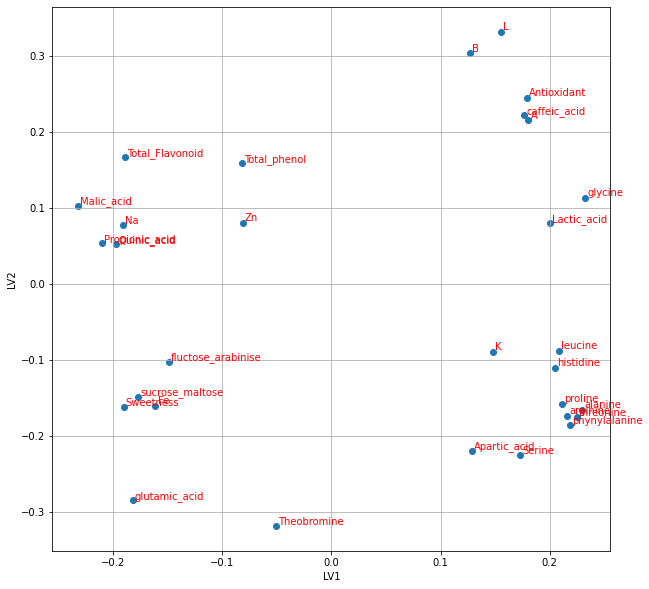

In [79]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(dpc['LV1'],dpc['LV2'])
plt.xlabel('LV1')
plt.ylabel('LV2')
plt.grid(b=None)

for i in range(dpc.shape[0]):
 plt.text(x=dpc.LV1[i]+0.002,y=dpc.LV2[i]+0.002,s=dpc.feature[i], 
          fontdict=dict(color='red',size=10))